In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

C1
r1


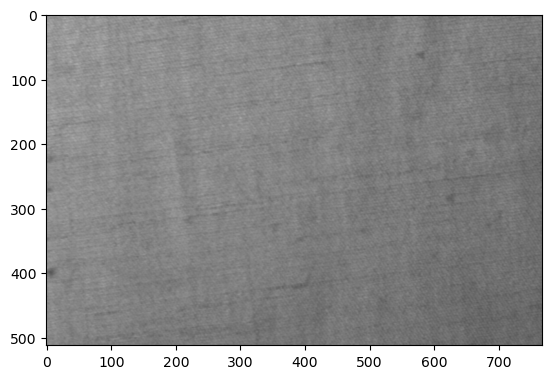

r3


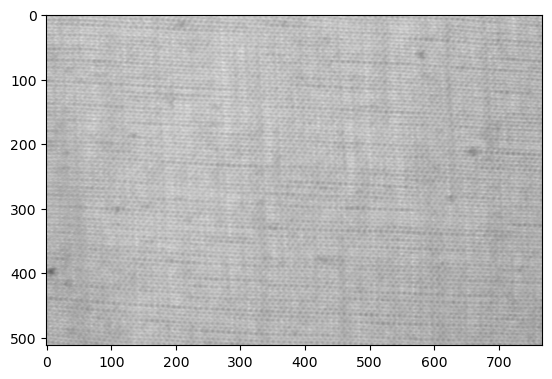

C2
r2


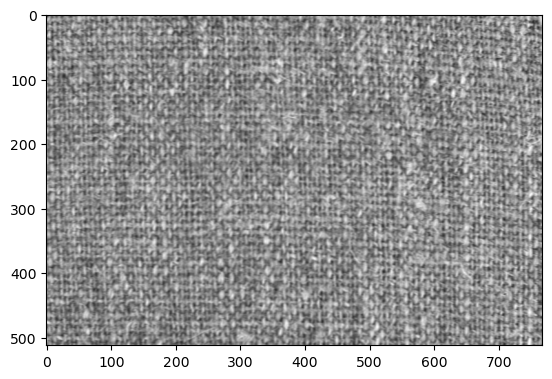

r3


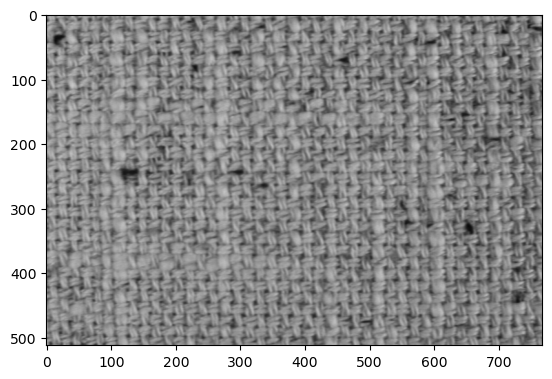

C3
r1


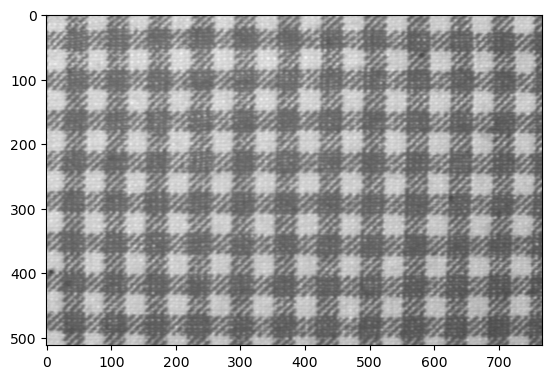

r3


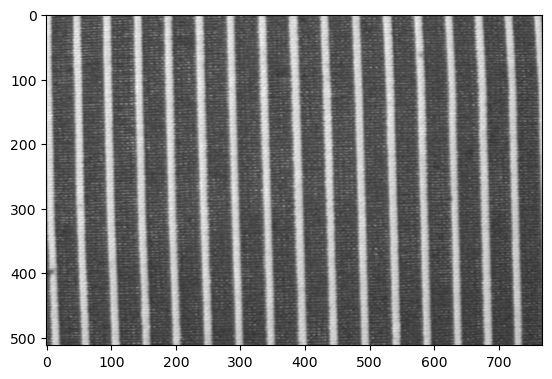

C4
r1


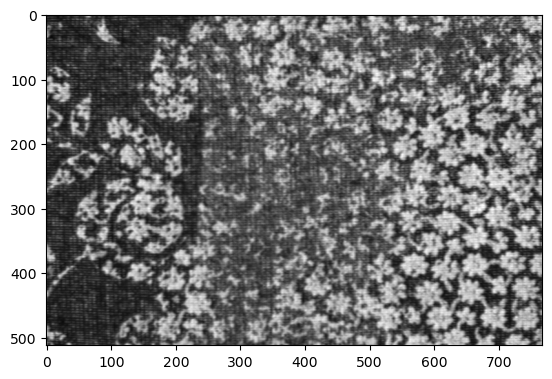

r3


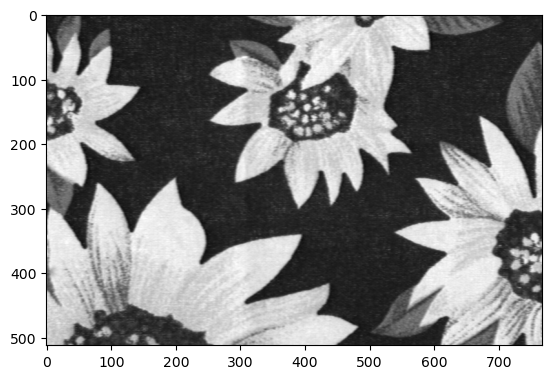

In [2]:
print("C1")

print("r1")
image = cv2.imread("DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif")
plt.imshow(image)
plt.show()
print("r3")
image = cv2.imread("DATASET/A1/c1/r3/images/e0/c1r3e0n1.tif")
plt.imshow(image)
plt.show()

print("C2")
print("r2")
image = cv2.imread("DATASET/A1/c2/r2/images/e0/c2r2e0n1.tif")
plt.imshow(image)
plt.show()
print("r3")
image = cv2.imread("DATASET/A1/c2/r3/images/e0/c2r3e0n1.tif")
plt.imshow(image)
plt.show()

print("C3")
print("r1")
image = cv2.imread("DATASET/A1/c3/r1/images/e0/c3r1e0n1.tif")
plt.imshow(image)
plt.show()
print("r3")
image = cv2.imread("DATASET/A1/c3/r3/images/e0/c3r3e0n1.tif")
plt.imshow(image)
plt.show()

print("C4")
print("r1")
image = cv2.imread("DATASET/A1/c4/r1/images/e0/c4r1e0n1.tif")
plt.imshow(image)
plt.show()
print("r3")
image = cv2.imread("DATASET/A1/c4/r3/images/e0/c4r3e0n1.tif")
plt.imshow(image)
plt.show()


**c1** → Fa referencia a teles llises.
- Dins de r1, tenim teles llises d'un color més fosc.
- Dins de r3, tenim teles llises d'un color més clar.

**c2** → Fa referencia a teles de tipus llana.
- Dins de r2, tenim teles amb el fil petit.
- Dins de r3, tenim teles amb el fil gran.

**c3** → Fa referencia a teles amb estampats tipus geomètics.
- Dins de r1, tenim teles amb estampat quadrat.
- Dins de r3, tenim teles amb estampat ratllat.

**c4** → Fa referencia a teles amb estampats diversos.
- Dins de r1, tenim teles amb estampats diferents.
- Dins de r3, tenim teles amb estampats florals.

In [3]:
from os.path import exists

def list_all_images_to_csv(dataset):
    imgs_per_combi = 100
    data = {"paths":[],"c":[],"r":[],"e":[],"n":[]}
    for c in range(1,5): #iterar totes les c
        for r in range(1,4): #iterar totes les r
            for e in range(0,8): #iterar totes les e
                for idx in range(imgs_per_combi): #quantes imatges per carpeta intentar
                    if(exists(f"DATASET/{dataset}/c{c}/r{r}/images/e{e}/c{c}r{r}e{e}n{idx}.tif")):
                        data["paths"].append(f"DATASET/{dataset}/c{c}/r{r}/images/e{e}/c{c}r{r}e{e}n{idx}.tif")
                        data["c"].append(c)
                        data["r"].append(r)
                        data["e"].append(e)
                        data["n"].append(idx)
    df = pd.DataFrame(data)
    df.to_csv("datasetgroga.csv")


In [4]:
list_all_images_to_csv("A1")

In [5]:
df = pd.read_csv("datasetgroga.csv")
df

,Unnamed: 0,paths,c,r,e,n
0,0,DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif,1,1,0,1
1,1,DATASET/A1/c1/r1/images/e0/c1r1e0n2.tif,1,1,0,2
2,2,DATASET/A1/c1/r1/images/e0/c1r1e0n3.tif,1,1,0,3
3,3,DATASET/A1/c1/r1/images/e0/c1r1e0n4.tif,1,1,0,4
4,4,DATASET/A1/c1/r1/images/e0/c1r1e0n5.tif,1,1,0,5
...,...,...,...,...,...,...
3143,3143,DATASET/A1/c4/r3/images/e7/c4r3e7n46.tif,4,3,7,46
3144,3144,DATASET/A1/c4/r3/images/e7/c4r3e7n47.tif,4,3,7,47
3145,3145,DATASET/A1/c4/r3/images/e7/c4r3e7n48.tif,4,3,7,48
3146,3146,DATASET/A1/c4/r3/images/e7/c4r3e7n49.tif,4,3,7,49


In [6]:
llista = []
num_ident = []

for index in range(len(df)):
    if df.iloc[index, 2]==1 and  df.iloc[index, 3]==1:
        llista.append("llisa-fosca")
        num_ident.append(0)
    elif df.iloc[index, 2]==1 and  df.iloc[index, 3]==3:
        llista.append("llisa-clar")
        num_ident.append(1)
    elif df.iloc[index, 2]==2 and  df.iloc[index, 3]==2:
        llista.append("llana-fil petit")
        num_ident.append(2)
    elif df.iloc[index, 2]==2 and  df.iloc[index, 3]==3:
        llista.append("llana-fil gran")
        num_ident.append(3)
    elif df.iloc[index, 2]==3 and  df.iloc[index, 3]==1:
        llista.append("geometric-quadrats")
        num_ident.append(4)
    elif df.iloc[index, 2]==3 and  df.iloc[index, 3]==3:
        llista.append("lgeometric-ratlles")
        num_ident.append(5)
    elif df.iloc[index, 2]==4 and  df.iloc[index, 3]==1:
        llista.append("divers-diferent")
        num_ident.append(6)
    elif df.iloc[index, 2]==4 and  df.iloc[index, 3]==3:
        llista.append("divers-flors")
        num_ident.append(7)

df =  df.assign(pattern = llista)  
df["patter_idx"] = num_ident
df.to_csv("datasetgroga.csv")